## STEG 1: DATAINSAMLING 

**Uppgift**: Ladda in data och beskriv den

In [1]:
# TODO: Importera pandas
import pandas as pd

# TODO: Ladda in data från CSV-fil
df = pd.read_csv("../data/Test.csv")


# TODO: Visa första 5 raderna
df.head()

# TODO: Visa antal rader och kolumner
df.shape

# TODO: Lista alla kolumner
list(df.columns)

['date_time',
 'is_holiday',
 'air_pollution_index',
 'humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'rain_p_h',
 'snow_p_h',
 'clouds_all',
 'weather_type',
 'weather_description']

**Förklaring**: [Beskriv kort vilken data ni har och vad kolumnerna betyder] 

---

Datan består av väderinformation och luftföroreningsnivåer, och varje rad representerar en timmes mätning. och kolumnen ser man på övre delan och vad det är.

## STEG 2: DATARENSNING 

**Uppgift**: Verifiera att data är OK

In [20]:
df.isnull().sum()

date_time                  0
is_holiday             14436
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


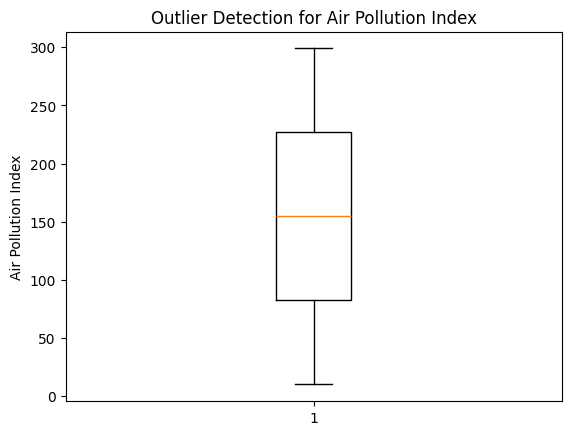

In [13]:
# TODO: Kolla efter saknade värden
df.isnull().sum()


# TODO: Kolla efter duplikater
df.duplicated().sum()

# TODO: Visa statistik för numeriska kolumner
df.describe()

# TODO: Kolla efter outliers (extremvärden)
import matplotlib.pyplot as plt

plt.boxplot(df["air_pollution_index"])
plt.title("Outlier Detection for Air Pollution Index")
plt.ylabel("Air Pollution Index")
plt.show()


**Slutsats**: [Är datan OK? Finns det problem?]

---

datan är bra skick men det finns endas saknade värden och det är kolmnunen is_holiday, men dom övriga kolumnen är kompletta.

## STEG 3: DATAANALYS 

**Uppgift**: Välj 2 analyser med grafer

### ANALYS 1: [Välj en analys från instruktionerna]

**Fråga**: [Vad vill ni ta reda på?]

1. analys: Finns det samband mellan temperaturen och luftföroreningensnivån(air_pollution_index)?

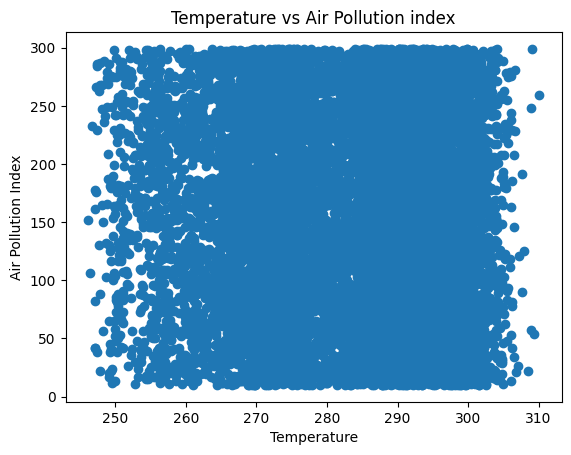

In [2]:
# TODO: Importera matplotlib
import matplotlib.pyplot as plt

# TODO: Gör din analys här
plt.scatter(df["temperature"], df["air_pollution_index"])


# TODO: Skapa en graf
plt.xlabel("Temperature")
plt.ylabel("Air Pollution Index")
plt.title("Temperature vs Air Pollution index")
plt.show()


**Resultat**: [Vad ser ni i grafen? 2-3 meningar]

---

I garffen ser vi inget samband mellan temperaturen och luftföroreningar, i olika temperatursnivå så förekommer både höga och löga luftföroreningar, som gör att temperaturen har inga starkt påverkan av luftföroreningsnivåerna.

### ANALYS 2: [Välj en till analys]

**Fråga**: [Vad vill ni ta reda på?]

In [ ]:
# TODO: Gör din analys här


# TODO: Skapa en graf


**Resultat**: [Vad ser ni? 2-3 meningar]

---

## STEG 4: PREDIKTIV MODELL 

**Uppgift**: Bygg en modell som förutsäger energiförbrukning

### 4.1 Välj Features

**Förklaring**: [Vilka features valde ni och VARFÖR?]

In [ ]:
# TODO: Importera sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# TODO: Välj features (X) och target (Y)
# X = 
# Y = 

# TODO: Dela data i träning och test (80/20)


### 4.2 Bygg och träna modellen

In [ ]:
# TODO: Skapa modellen


# TODO: Träna modellen


# TODO: Gör prediktioner på testdata


### 4.3 Utvärdera modellen

In [ ]:
# TODO: Beräkna R² score


# TODO: Beräkna MAE (Mean Absolute Error)


# TODO: Skapa en graf som visar prediktioner vs verkliga värden


**Resultat**: 
- R² Score: [Ditt värde här]
- MAE: [Ditt värde här]

**Diskussion**: [Är modellen bra eller dålig? Varför? 3-5 meningar]

---

## STEG 5: REKOMMENDATIONER - VG uppgift

Baserat på era analyser, ge  **1 konkret rekommendation**.

### REKOMMENDATION 1: [Titel]

**Varför**: [Baserat på vilken analys?]

**Åtgärd**: [Vad ska familjen göra?]

**Effekt**: [Vad händer?]

---